# Dependencias

In [193]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, classification_report
from sklearn.metrics import confusion_matrix, log_loss, precision_recall_curve, auc, cohen_kappa_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay



In [145]:
df = pd.read_csv('C:/Users/Acer/OneDrive/Escritorio/ejercicio_ML/model/datos_limpios.csv')
df.head()

,warranty,sub_status,condition,seller_contact,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,location,...,geolocation,sold_quantity,available_quantity,seller_longitude,shipping_local_pick_up,has_discount,publication_duration,sell_through_rate,sell_through_range,is_official
0,Sin garantía,[],new,No disponible,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1,-58.398671,True,False,60,0.0,0-20%,0
1,NUESTRA REPUTACION,[],used,No disponible,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1,-58.505917,True,False,60,0.0,0-20%,0
2,Sin garantía,[],used,No disponible,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1,-58.414395,True,False,60,0.0,0-20%,0
3,Sin garantía,[],new,No disponible,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],{},...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1,-58.492921,True,False,66,0.0,0-20%,0
4,MI REPUTACION.,[],used,No disponible,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],{},...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1,-58.549504,True,False,60,0.0,0-20%,0


## Preprocesamiento

Se emplea un ColumnTransformer para procesar diferentes tipos de variables:





Numéricas: Imputación con la mediana (SimpleImputer) y escalado con StandardScaler.



Categóricas: Imputación con "missing" (SimpleImputer) y codificación con OneHotEncoder.



Booleanas: Imputación con el valor más frecuente (SimpleImputer).

In [146]:
# Eliminar columnas no necesarias
columnas_a_eliminar = [
    'sub_status', 'non_mercado_pago_payment_methods', 'seller_id', 'variations',
    'location', 'site_id', 'listing_type_id', 'attributes', 'buying_mode', 'tags',
    'listing_source', 'coverage_areas', 'pictures', 'official_store_id', 'differential_pricing',
    'accepts_mercadopago', 'currency_id', 'title', 'automatic_relist', 'stop_time', 'start_time',
    'geolocation', 'seller_longitude', 'publication_duration', 'sell_through_rate', 'sell_through_range',
    'seller_contact', 'deal_ids', 'parent_item_id', 'descriptions', 'id', 'thumbnail',
    'secure_thumbnail', 'status', 'video_id', 'catalog_product_id', 'subtitle', 'permalink'
]
df_cleand = df.drop(columns=columnas_a_eliminar, errors='ignore')


In [147]:
df_cleand.head()

,warranty,condition,base_price,price,category_id,last_updated,international_delivery_mode,original_price,date_created,initial_quantity,sold_quantity,available_quantity,shipping_local_pick_up,has_discount,is_official
0,Sin garantía,new,80.0,80.0,MLA126406,2015-09-05 20:42:58+00:00,none,NaN,2015-09-05 20:42:53+00:00,1,0,1,True,False,0
1,NUESTRA REPUTACION,used,2650.0,2650.0,MLA10267,2015-09-26 18:08:34+00:00,none,NaN,2015-09-26 18:08:30+00:00,1,0,1,True,False,0
2,Sin garantía,used,60.0,60.0,MLA1227,2015-09-09 23:57:10+00:00,none,NaN,2015-09-09 23:57:07+00:00,1,0,1,True,False,0
3,Sin garantía,new,580.0,580.0,MLA86345,2015-10-05 16:03:50.306000+00:00,none,NaN,2015-09-28 18:47:56+00:00,1,0,1,True,False,0
4,MI REPUTACION.,used,30.0,30.0,MLA41287,2015-08-28 13:37:41+00:00,none,NaN,2015-08-24 22:07:20+00:00,1,0,1,True,False,0


In [148]:
print(df_cleand.dtypes)

warranty                        object
condition                       object
base_price                     float64
price                          float64
category_id                     object
last_updated                    object
international_delivery_mode     object
original_price                 float64
date_created                    object
initial_quantity                 int64
sold_quantity                    int64
available_quantity               int64
shipping_local_pick_up            bool
has_discount                      bool
is_official                      int64
dtype: object


In [149]:
# Verificar valores faltantes
print(df_cleand.isnull().sum())


warranty                           1
condition                          0
base_price                         0
price                              0
category_id                        0
last_updated                       0
international_delivery_mode        0
original_price                 99857
date_created                       0
initial_quantity                   0
sold_quantity                      0
available_quantity                 0
shipping_local_pick_up             0
has_discount                       0
is_official                        0
dtype: int64


In [150]:

df_cleand['warranty'].fillna('No disponible', inplace=True)

df_cleand['original_price'].fillna(df_cleand['price'].median(), inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_20668\1423008692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleand['warranty'].fillna('No disponible', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_20668\1423008692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [151]:

df_cleand.isnull().sum()



warranty                       0
condition                      0
base_price                     0
price                          0
category_id                    0
last_updated                   0
international_delivery_mode    0
original_price                 0
date_created                   0
initial_quantity               0
sold_quantity                  0
available_quantity             0
shipping_local_pick_up         0
has_discount                   0
is_official                    0
dtype: int64

In [152]:
# Revisar el estado final del DataFrame
df_cleand.dtypes


warranty                        object
condition                       object
base_price                     float64
price                          float64
category_id                     object
last_updated                    object
international_delivery_mode     object
original_price                 float64
date_created                    object
initial_quantity                 int64
sold_quantity                    int64
available_quantity               int64
shipping_local_pick_up            bool
has_discount                      bool
is_official                      int64
dtype: object

In [159]:
# Convertir tipos de datos
df_cleand['warranty'] = df_cleand['warranty'].astype('category')
df_cleand['condition'] = df_cleand['condition'].astype('category')
df_cleand['category_id'] = df_cleand['category_id'].astype('category')
df_cleand['date_created'] = pd.to_datetime(df_cleand['date_created'], errors='coerce')
df_cleand['last_updated'] = pd.to_datetime(df_cleand['last_updated'], errors='coerce')
df_cleand['is_official'] = df_cleand['is_official'].astype('bool')


In [160]:
print(df_cleand.dtypes)

warranty                                  category
condition                                 category
base_price                                 float64
price                                      float64
category_id                               category
last_updated                   datetime64[ns, UTC]
international_delivery_mode                 object
original_price                             float64
date_created                   datetime64[ns, UTC]
initial_quantity                             int64
sold_quantity                                int64
available_quantity                           int64
shipping_local_pick_up                        bool
has_discount                                  bool
is_official                                   bool
dtype: object


In [161]:
# Codificar la variable objetivo 'condition'
label_encoder = LabelEncoder()
df_cleand['condition'] = label_encoder.fit_transform(df_cleand['condition'])

In [162]:
# Separar variables predictoras y objetivo
X = df_cleand.drop(columns=['condition'])
y = df_cleand['condition']


In [176]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [177]:
# Opcional: Crear un subconjunto de datos para pruebas rápidas
sample_size = 0.9
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, stratify=y_train, random_state=42)
X_test_sample, _, y_test_sample, _ = train_test_split(X_test, y_test, train_size=sample_size, stratify=y_test, random_state=42)

In [178]:
# Extraer año y mes de las fechas antes de eliminar las columnas originales
for col in ['last_updated', 'date_created']:
    X_train[f'{col}_year'] = pd.to_datetime(X_train[col], errors='coerce').dt.year.fillna(0).astype(int)
    X_train[f'{col}_month'] = pd.to_datetime(X_train[col], errors='coerce').dt.month.fillna(0).astype(int)
    X_test[f'{col}_year'] = pd.to_datetime(X_test[col], errors='coerce').dt.year.fillna(0).astype(int)
    X_test[f'{col}_month'] = pd.to_datetime(X_test[col], errors='coerce').dt.month.fillna(0).astype(int)
    X_train_sample[f'{col}_year'] = pd.to_datetime(X_train_sample[col], errors='coerce').dt.year.fillna(0).astype(int)
    X_train_sample[f'{col}_month'] = pd.to_datetime(X_train_sample[col], errors='coerce').dt.month.fillna(0).astype(int)
    X_test_sample[f'{col}_year'] = pd.to_datetime(X_test_sample[col], errors='coerce').dt.year.fillna(0).astype(int)
    X_test_sample[f'{col}_month'] = pd.to_datetime(X_test_sample[col], errors='coerce').dt.month.fillna(0).astype(int)

In [179]:
# Eliminar columnas de fechas originales
X_train = X_train.drop(columns=['last_updated', 'date_created'], errors='ignore')
X_test = X_test.drop(columns=['last_updated', 'date_created'], errors='ignore')
X_train_sample = X_train_sample.drop(columns=['last_updated', 'date_created'], errors='ignore')
X_test_sample = X_test_sample.drop(columns=['last_updated', 'date_created'], errors='ignore')


In [180]:
# Verificar que las columnas derivadas existen
print("Columnas en X_train_sample:", X_train_sample.columns.tolist())

Columnas en X_train_sample: ['warranty', 'base_price', 'price', 'category_id', 'international_delivery_mode', 'original_price', 'initial_quantity', 'sold_quantity', 'available_quantity', 'shipping_local_pick_up', 'has_discount', 'is_official', 'last_updated_year', 'last_updated_month', 'date_created_year', 'date_created_month']


In [181]:
# Definir columnas por tipo
numeric_features = [
    'base_price', 'price', 'original_price', 'initial_quantity', 'sold_quantity', 'available_quantity',
    'last_updated_year', 'last_updated_month', 'date_created_year', 'date_created_month'
]
categorical_features = ['warranty', 'category_id', 'international_delivery_mode']
boolean_features = ['shipping_local_pick_up', 'has_discount', 'is_official']

In [182]:
# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features),
    ('bool', 'passthrough', boolean_features)
])

In [183]:
# Definir modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


## Entrenamiento

In [184]:
# Entrenar y evaluar modelos
results = []
for name, model in models.items():
    # Crear pipeline con preprocesamiento y modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train_sample, y_train_sample)
    
    # Predecir sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test_sample)
    
    # Guardar métricas de evaluación
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_sample, y_pred),
        "Precision": precision_score(y_test_sample, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test_sample, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_test_sample, y_pred, average='weighted', zero_division=0)
    })

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:07:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [185]:
# Mostrar resultados en DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.816000   0.817911  0.816000  0.816249
1                  KNN  0.814889   0.819502  0.814889  0.815120
2                  SVM  0.805944   0.811678  0.805944  0.806142
3        Decision Tree  0.803333   0.807832  0.803333  0.803582
4        Random Forest  0.824000   0.829866  0.824000  0.824177
5                  MLP  0.813667   0.817757  0.813667  0.813914
6              XGBoost  0.810611   0.827057  0.810611  0.810065


El modelo Random Forest se entrena utilizando el pipeline, con los datos divididos en conjuntos de entrenamiento y prueba mediante train_test_split. Aunque el código completo del entrenamiento no está visible en el fragmento proporcionado, se infiere que se ajusta el modelo con:

Random Forest obtuvo el mejor desempeño, con un Accuracy de 0.824 y un F1 Score de 0.824.



In [187]:
best_model = models["Random Forest"]
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])
pipeline.fit(X_train_sample, y_train_sample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['base_price', 'price',
                                                   'original_price',
                                                   'initial_quantity',
                                                   'sold_quantity',
                                                   'available_quantity',
                                                   'last_updated_year',
                                                   'last_updated_month',
                                                   'date_created_year',
                                                   'date_created_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['warranty', 'category_id',
                                                   'international_delivery_mode']),
                                                 ('bool', 'passthrough',
                                                  ['shipping_local_pick_up',
                                                   'has_discount',
                                                   'is_official'])])),
                ('classifier', RandomForestClassifier())])

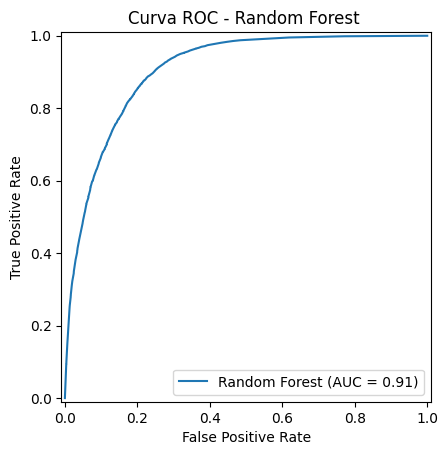

In [189]:
y_proba = pipeline.predict_proba(X_test_sample)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_sample, y_proba)
roc_auc = auc(fpr, tpr)
# Mostrar curva ROC
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Random Forest").plot()
plt.title("Curva ROC - Random Forest ")
plt.show()


In [190]:
# Imprimir AUC
print(f"AUC (Área bajo la curva): {roc_auc:.4f}")

AUC (Área bajo la curva): 0.9054


In [191]:
# Reporte de métricas
y_pred = pipeline.predict(X_test_sample)
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      9677
           1       0.78      0.87      0.82      8323

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



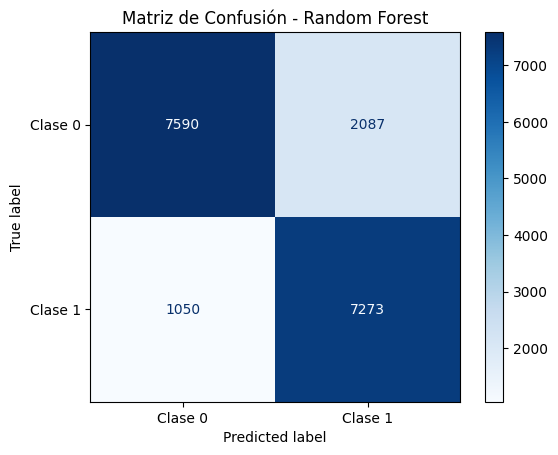

In [192]:
# 1. Matriz de Confusión
cm = confusion_matrix(y_test_sample, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

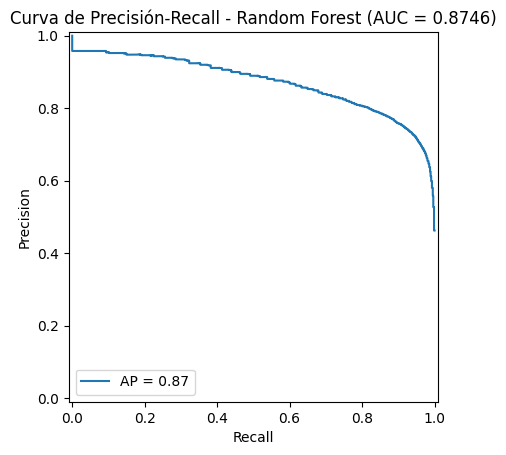

In [194]:
# 3. Curva de Precisión-Recall
precision, recall, thresholds = precision_recall_curve(y_test_sample, y_proba)
pr_auc = auc(recall, precision)
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=pr_auc)
disp.plot()
plt.title(f'Curva de Precisión-Recall - Random Forest (AUC = {pr_auc:.4f})')
plt.show()

Análisis de Importancia de Características

Número de nombres de características: 17793
Número de importancias: 17793


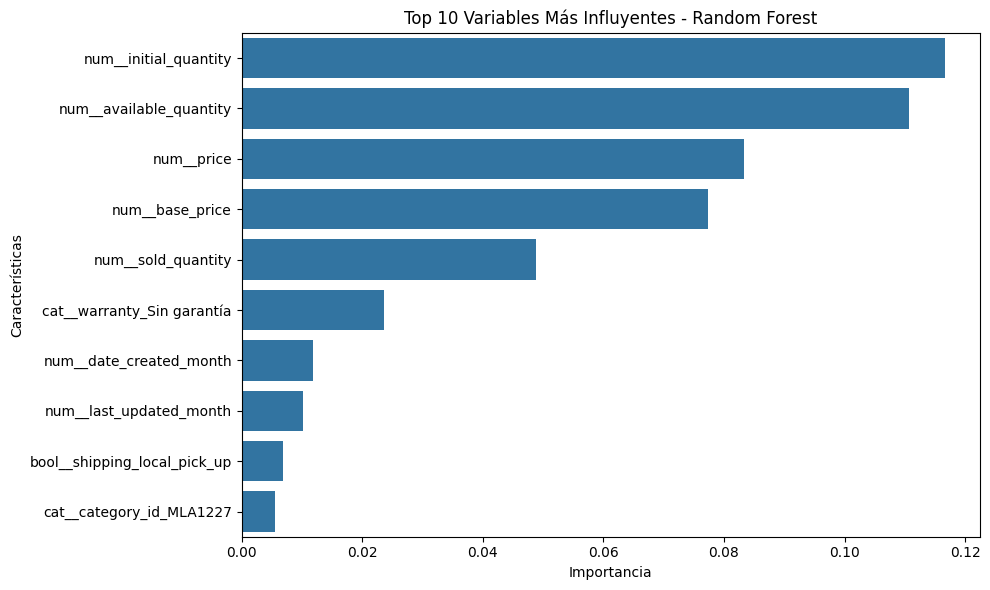

Importancia de las características:
                            Feature  Importance
3             num__initial_quantity    0.116640
5           num__available_quantity    0.110705
1                        num__price    0.083287
0                   num__base_price    0.077296
4                num__sold_quantity    0.048774
6578     cat__warranty_Sin garantía    0.023650
9           num__date_created_month    0.011756
7           num__last_updated_month    0.010154
17790  bool__shipping_local_pick_up    0.006885
9402       cat__category_id_MLA1227    0.005576


In [197]:

# 1. Acceder al modelo RandomForestClassifier dentro del Pipeline
rf_model = pipeline.named_steps['classifier']  # Verifica que 'classifier' sea el nombre correcto

# 2. Obtener las importancias de las características
feature_importances = rf_model.feature_importances_

# 3. Obtener los nombres de las características transformadas
preprocessor = pipeline.named_steps['preprocessor']  # Verifica que 'preprocessor' sea el nombre correcto

# Obtener los nombres de las características después del preprocesamiento
feature_names = preprocessor.get_feature_names_out()

# 4. Verificar las longitudes
print(f"Número de nombres de características: {len(feature_names)}")
print(f"Número de importancias: {len(feature_importances)}")

# Si las longitudes no coinciden, lanza un error con información
if len(feature_names) != len(feature_importances):
    raise ValueError(
        f"Desajuste: {len(feature_names)} nombres de características vs "
        f"{len(feature_importances)} importancias. "
        "Revisa la configuración del ColumnTransformer."
    )

# 5. Crear un DataFrame con las importancias y los nombres de las características
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 6. Ordenar por importancia (de mayor a menor)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 7. Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Mostrar las 10 más importantes
plt.title('Top 10 Variables Más Influyentes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# 8. Imprimir las importancias para referencia
print("Importancia de las características:")
print(importance_df.head(10))

## Conclusiones


Modelo Seleccionado: Random Forest es el modelo más adecuado, con un Accuracy de 0.824 y un F1 Score de 0.824, superando a otros modelos como Logistic Regression y XGBoost.



Factores Clave: Las variables relacionadas con la disponibilidad (initial_quantity, available_quantity) y el precio (price, base_price) son las más influyentes, lo que sugiere que los compradores valoran el stock y precios competitivos. La ausencia de garantía (warranty_Sin garantía) también tiene un impacto notable.